In [62]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches 

from sklearn import datasets 
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import StratifiedKFold 

iris = datasets.load_iris() 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

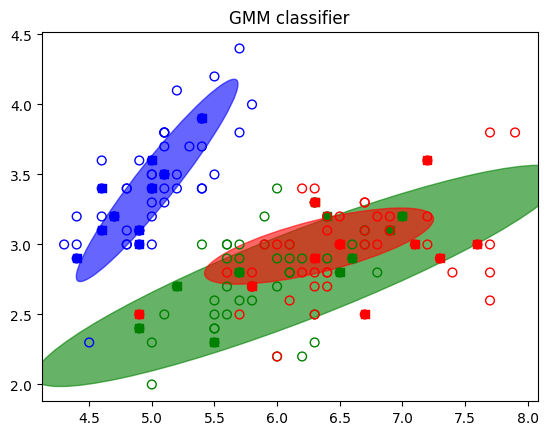

In [65]:
indices = StratifiedKFold(n_splits=5).split(iris.data, iris.target) 

# 最初のサブグループを取得する
train_index, test_index = next(iter(indices)) 

# 訓練用データとラベルを取得する
X_train = iris.data[train_index] 
y_train = iris.target[train_index] 

# 検証用データとラベルを取得する
X_test = iris.data[test_index] 
y_test = iris.target[test_index] 

num_classes = len(np.unique(y_train)) 
gmm = GaussianMixture(n_components=num_classes, covariance_type='full', 
                      init_params='random', random_state=0, max_iter=20) 
gmm.means_init = np.array([X_train[y_train == i].mean(axis=0) 
                               for i in range(num_classes)]) 
gmm.fit(X_train) 

plt.figure() 
axis_handle = plt.subplot(1, 1, 1)
colors = 'bgr' 
for i, color in enumerate(colors): 
    eigenvalues, eigenvectors = np.linalg.eigh( 
        gmm.covariances_[i][:2, :2]) 
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0]) 
    angle = np.arctan2(norm_vec[1], norm_vec[0]) 
    angle = 180 * angle / np.pi 
    scaling_factor = 8 
    eigenvalues *= scaling_factor 
    ellipse = patches.Ellipse(gmm.means_[i, :2], 
                eigenvalues[0], eigenvalues[1], angle=(180 + angle), 
                color=color) 

    ellipse.set_clip_box(axis_handle.bbox) 
    ellipse.set_alpha(0.6) 
    axis_handle.add_artist(ellipse) 

for i, color in enumerate(colors): 
    cur_data = iris.data[iris.target == i] 
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
                facecolors='none', edgecolors=color, s=40, 
                label=iris.target_names[i]) 
    
    test_data = X_test[y_test == i] 
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
                facecolors=color, edgecolors=color, s=40, 
                label=iris.target_names[i]) 

plt.title('GMM classifier') 
plt.show()

In [64]:
y_train_pred = gmm.predict(X_train) 
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100 
print('Accuracy on training data =', accuracy_training) 

y_test_pred = gmm.predict(X_test) 
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100 
print('Accuracy on testing data =', accuracy_testing) 

Accuracy on training data = 87.5
Accuracy on testing data = 86.66666666666667
